<span style="font-size: 300%;color:white;background:#1155cc"> MASZYNA CCR cvxopt</span>

<span style="font-size: 300%;color:white;background:##ffd966"> ŚMIECI      wersja 2.52 Informacja zarządcza</span> 

# dalsze eksperymenty nad zrobieniem masowego algorytmu 

In [1]:
import numpy as np
import pandas as pd

BANKI = np.array([[5.0,4,6,3,5,10,3,4,5,7],     ## Absencja - ilość dni absencji (czym więcej tym gorzej)
                  [0.21,0.32,0.14,0.13,0.1,0.16,0.13,0.15,0.18,0.16],  ## Puste przebiegi (czym więcej tym gorzej)
                  [3997.0,2152,1650,1645,1807,2767,3939,3380,3458,2063], ## przejechane kilometry (czym więcej tym gorzej)
                  [ 5.0,4,7,2,11,12,6,4,3,6],   # Liczba zastrzeżeń (czym więcej tym gorzej)
                  [ 1502.0,3100,700,1240,1100,180,600,1520,1050,655],  # koszty hoteli (czym więcej tym gorzej)
                  [ 0.65,0.21,0.70,0.12,0.21,0.45,0.61,0.25,0.43,0.35],  # Stosunek czasu jazdy do czasu spotkań (czym więcej tym gorzej) 
                  [971.0,859,766,1040,1009,829,561,656,771,827],   #zysk
                  [211.0,120,172,107,395,74,82,54,56,82]])     #ilość transakcji
                

In [2]:
from tabulate import tabulate

## "plain","simple","grid","pipe","orgtbl","rst","mediawiki","latex", "fancy_grid" 

# 
fot = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']
index_values = ['Dni abs.', 'Puste km ', 'Prze. km ', 'Uwagi', 'K.hoteli','U.jazdy','Przychód', 'L.umów']

# headers= fot,
# ,showindex=index_values

tab_PRA = tabulate(BANKI,headers= fot,tablefmt="fancy_grid",showindex=index_values)  
print(tab_PRA)

╒══════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│          │      P1 │      P2 │      P3 │      P4 │      P5 │      P6 │      P7 │      P8 │      P9 │     P10 │
╞══════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ Dni abs. │    5    │    4    │    6    │    3    │    5    │   10    │    3    │    4    │    5    │    7    │
├──────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Puste km │    0.21 │    0.32 │    0.14 │    0.13 │    0.1  │    0.16 │    0.13 │    0.15 │    0.18 │    0.16 │
├──────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Prze. km │ 3997    │ 2152    │ 1650    │ 1645    │ 1807    │ 2767    │ 3939    │ 3380    │ 3458    │ 2063    │
├──────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────

In [3]:
BANKI

array([[5.000e+00, 4.000e+00, 6.000e+00, 3.000e+00, 5.000e+00, 1.000e+01,
        3.000e+00, 4.000e+00, 5.000e+00, 7.000e+00],
       [2.100e-01, 3.200e-01, 1.400e-01, 1.300e-01, 1.000e-01, 1.600e-01,
        1.300e-01, 1.500e-01, 1.800e-01, 1.600e-01],
       [3.997e+03, 2.152e+03, 1.650e+03, 1.645e+03, 1.807e+03, 2.767e+03,
        3.939e+03, 3.380e+03, 3.458e+03, 2.063e+03],
       [5.000e+00, 4.000e+00, 7.000e+00, 2.000e+00, 1.100e+01, 1.200e+01,
        6.000e+00, 4.000e+00, 3.000e+00, 6.000e+00],
       [1.502e+03, 3.100e+03, 7.000e+02, 1.240e+03, 1.100e+03, 1.800e+02,
        6.000e+02, 1.520e+03, 1.050e+03, 6.550e+02],
       [6.500e-01, 2.100e-01, 7.000e-01, 1.200e-01, 2.100e-01, 4.500e-01,
        6.100e-01, 2.500e-01, 4.300e-01, 3.500e-01],
       [9.710e+02, 8.590e+02, 7.660e+02, 1.040e+03, 1.009e+03, 8.290e+02,
        5.610e+02, 6.560e+02, 7.710e+02, 8.270e+02],
       [2.110e+02, 1.200e+02, 1.720e+02, 1.070e+02, 3.950e+02, 7.400e+01,
        8.200e+01, 5.400e+01, 5.600e+

<span style="font-size: 200%;color:white;background:#1155cc"> 1 </span>
<span style="font-size: 200%;color:white;background:#a2c4c9">    Mamy sobie taką baze danych z bankami
    
    pierwsze cztery wiersze oznaczają nakłady, ostatnie dwa wiersze oznaczają efekty 

In [4]:
# creating a list of index names
index_values = ['Ilość dni absencji', 'Puste przebiegi ', 'Przejechane kilometry', 'Liczba zastrzeżeń', 'Koszty hoteli','Stosunek czasu jazdy do czasu spotkań','Przychód', 'Ilość transakcji']
   
# creating a list of column names
column_values = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']

df = pd.DataFrame(data = BANKI, 
                  index = index_values, 
                  columns = column_values)

In [5]:
df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
Ilość dni absencji,5.00,4.00,6.00,3.00,5.00,10.00,3.00,4.00,5.00,7.00
Puste przebiegi,0.21,0.32,0.14,0.13,0.10,0.16,0.13,0.15,0.18,0.16
Przejechane kilometry,3997.00,2152.00,1650.00,1645.00,1807.00,2767.00,3939.00,3380.00,3458.00,2063.00
Liczba zastrzeżeń,5.00,4.00,7.00,2.00,11.00,12.00,6.00,4.00,3.00,6.00
Koszty hoteli,1502.00,3100.00,700.00,1240.00,1100.00,180.00,600.00,1520.00,1050.00,655.00
Stosunek czasu jazdy do czasu spotkań,0.65,0.21,0.70,0.12,0.21,0.45,0.61,0.25,0.43,0.35
Przychód,971.00,859.00,766.00,1040.00,1009.00,829.00,561.00,656.00,771.00,827.00
Ilość transakcji,211.00,120.00,172.00,107.00,395.00,74.00,82.00,54.00,56.00,82.00


<span style="font-size: 200%;color:white;background:#1155cc"> 2 </span>
<span style="font-size: 200%;color:white;background:#f4cccc">  Liczymy pierwszy bank - tworzymy wektor nakładów
    
    pierwsze cztery wiersze oznaczają nakłady, ostatnie dwa wiersze oznaczają efekty 

In [6]:
# BB = 'B7' # <-- TU WPISUJEMY NAZWĘ BANKU, KTÓRY BĘDZIE ANALIZOWANY 
RR = 6   # <-- ILE JEST W BAZIE WIERSZY Z NAKŁADAMI
# df  # nazwa bazy danych

In [7]:
def matrix(name,BB,RR,df):
    
    import numpy as np
    from cvxopt import matrix
    from cvxopt import solvers
    
    global x, wynik
    global dfv
    
## ---WEK---------------tworzymy wektor nakładów dla wybranego obiektu---
    WEK = df[BB][:RR]
    WEK = np.array(WEK)  
    WEK = WEK*-1
    mop = np.array([0,0])  ## <--- WPISUJĘ ilość wierszy rezultatów tz. 2 wiersze to [0,0]
    WEK = np.append(WEK, mop, axis=0) 
## ---KOR---------------tworzymy wektor efektów dla wybranego obiektu----
    KOR = df[BB][RR:]
    KOR = np.array(KOR)  
    KOR = KOR*-1
    ze = np.zeros(RR)               # <--- UWAGA! Liczba wierszy z kosztami
    KOR = np.append(ze,KOR, axis=0)    
## ---NAKŁADY--Tworzymy macierz nakładów dla wszystkich--------------
    NAKŁADY = df[:RR] 
    NAKŁADY = np.array(NAKŁADY)  
    NAKŁADY = NAKŁADY.T
##---EFEKTY--Tworzymy wektor efektów dla wszystkich-------------------
    EFEKTY = df[RR:]
    EFEKTY = np.array(EFEKTY)
    EFEKTY = EFEKTY.T*-1
##---Łączymy MACIERZ efektów i nakładów dla wszystkich----------------
    GN = np.append(NAKŁADY,EFEKTY, axis=1)     
##--Dodajemy do macierzy efe. i nak., wektor specjalny dla wybranego obiektu -------
    WEK = WEK.reshape(1,8)     # <--- UWAGA! Liczba wierszy z kosztami + wynikami
    GN = np.append(WEK,GN, axis=0) 
    
##---Macierz warunków znakowych ----------------------------------------
    w,k = GN.shape
    ZERO = np.eye(w-1, k=0, dtype=int) *-1
    w,k = ZERO.shape
    ze = np.zeros(w)
    ze = ze.reshape(1,w)
    ZERO = np.append(ze,ZERO, axis=0) 
    w,k = ZERO.shape
    zk = np.zeros(w)
    
    # Dodajemy wektor z jedynką k
    zk =zk.reshape(w,1)
    GF = np.append(ZERO,zk, axis=1) 
    w, k = GF.shape
    GF[w-1,k-1]=1
### ----OSTATECZNA MACIERZ ----Łączymy wszystkie macierze
    GK = np.append(GN,GF, axis=1) 
    G = GK.tolist()
### ----Tworzę wektor celu c------------------------
    w,k = GK.shape
    C = np.zeros(w)
    C[0]=1
    C = C.tolist()
### ----Tworzę wektor wyników h--------------------
    a = KOR.shape
    nt = k-a[0]
    nv = np.zeros(nt)
    h = np.append(KOR,nv, axis=0) 
    h = h.tolist()
###----------------------------------    
  
    c = matrix(C) ## <== przy Maxymalizacji oba znaki mają być ujemne
    G = matrix(G)
    h = matrix(h)

    solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
    sol = solvers.lp(c, G, h)
    zysk = sol['primal objective']


    #print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
    x =np.array(sol['x']).round(3)
        
    #na = ['Bank Handlowy', 'BRE Bank', 'BIG Bank', 'Citibank', 'PKO BP', 'Bank Gospodarstwa Krajowego', 'Bank Śląski', 'PeKaO S.A.', 'Opel Bank', 'Bank Gospodarki Żywnościowej']
    #na = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9']
    
    dfv = pd.DataFrame({'Pracownik':name, 'k':x[0],
                        column_values[0]:x[1],
                        column_values[1]:x[2],
                        column_values[2]:x[3],
                        column_values[3]:x[4],
                        column_values[4]:x[5],
                        column_values[5]:x[6],
                        column_values[6]:x[7],
                        column_values[7]:x[8],
                        column_values[8]:x[9]})
    
    return dfv
     

In [8]:
def Cohen(BANKI,name):

    global ranking_CCR
    
    ranking_CCR = []
    
    for e, n in  zip(BANKI,name):        

        results = matrix(n,e,6,df)  # <--- UWAGA! Liczba wierszy z kosztami
        ranking_CCR.append(results)
    ranking_CCR = pd.concat(ranking_CCR)   
          
    return ranking_CCR

In [9]:
BANKI = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9']
#name = ['Bank Handlowy', 'BRE Bank', 'BIG Bank', 'Citibank', 'PKO BP', 'Bank Gospodarstwa Krajowego', 'Bank Śląski', 'PeKaO S.A.', 'Opel Bank', 'Bank Gospodarki Żywnościowej']
name = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9']

In [10]:
Cohen(BANKI,name)

,Pracownik,k,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,P1,0.989,0.0,0.0,0.0,0.952,0.276,0.000,0.0,0.0,0.0
0,P2,0.676,0.0,0.0,0.0,0.721,0.109,0.000,0.0,0.0,0.0
0,P3,0.985,-0.0,-0.0,0.0,0.230,0.329,0.235,-0.0,-0.0,-0.0
0,P4,1.000,0.0,-0.0,-0.0,1.000,0.000,-0.000,-0.0,-0.0,-0.0
0,P5,1.000,0.0,-0.0,-0.0,0.000,1.000,-0.000,-0.0,-0.0,-0.0
0,P6,1.000,-0.0,-0.0,0.0,0.000,0.000,1.000,0.0,-0.0,0.0
0,P7,0.927,0.0,0.0,0.0,0.351,0.088,0.128,0.0,0.0,0.0
0,P8,0.530,0.0,0.0,0.0,0.539,0.095,0.000,0.0,0.0,0.0
0,P9,0.806,0.0,0.0,0.0,0.670,0.000,0.090,0.0,0.0,0.0


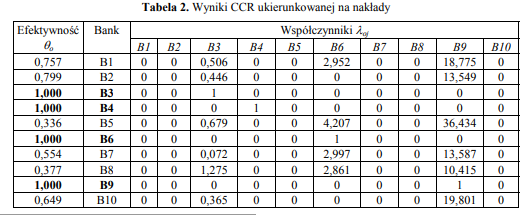

In [11]:
df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
Ilość dni absencji,5.00,4.00,6.00,3.00,5.00,10.00,3.00,4.00,5.00,7.00
Puste przebiegi,0.21,0.32,0.14,0.13,0.10,0.16,0.13,0.15,0.18,0.16
Przejechane kilometry,3997.00,2152.00,1650.00,1645.00,1807.00,2767.00,3939.00,3380.00,3458.00,2063.00
Liczba zastrzeżeń,5.00,4.00,7.00,2.00,11.00,12.00,6.00,4.00,3.00,6.00
Koszty hoteli,1502.00,3100.00,700.00,1240.00,1100.00,180.00,600.00,1520.00,1050.00,655.00
Stosunek czasu jazdy do czasu spotkań,0.65,0.21,0.70,0.12,0.21,0.45,0.61,0.25,0.43,0.35
Przychód,971.00,859.00,766.00,1040.00,1009.00,829.00,561.00,656.00,771.00,827.00
Ilość transakcji,211.00,120.00,172.00,107.00,395.00,74.00,82.00,54.00,56.00,82.00


<span style="font-size: 200%;color:white;background:#1155cc"> 4 </span>
<span style="font-size: 200%;color:white;background:#a2c4c9"> Obliczam optymalną technologię dla handlowca

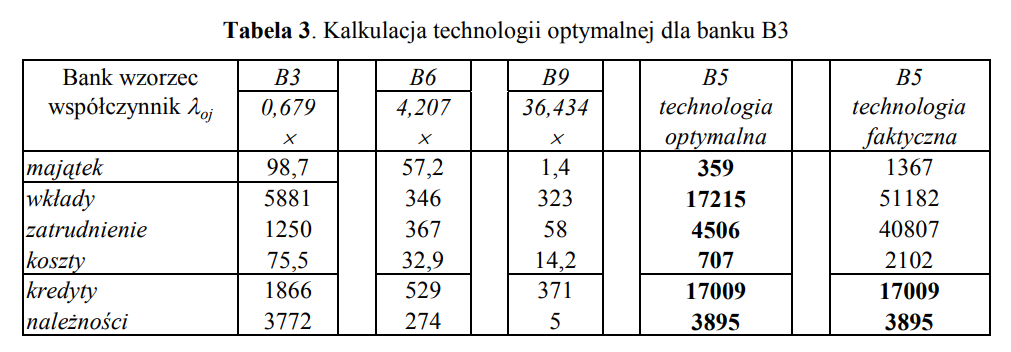

#### Tworzę listę pracowników peletonowych (najlepszych)

In [12]:
PEL = ranking_CCR.loc[ranking_CCR.k ==1]['Pracownik'].tolist()
PEL

['P4', 'P5', 'P6']

#### Tworzę macierz tylko pracowników  peletonowych (najlepszych) aby sprawdzić i pokazać czym różnia sie od innych

In [13]:
M = 'P8'     ## <-- wybrałem pracownika nienajlepszego

In [14]:
PKP = pd.concat([ranking_CCR['Pracownik'],ranking_CCR[PEL]], axis=1)
ffd = PKP[PKP['Pracownik']== M]
ffd

,Pracownik,P4,P5,P6
0,P8,0.539,0.095,0.0


In [15]:
Cohen(BANKI,name)

,Pracownik,k,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,P1,0.989,0.0,0.0,0.0,0.952,0.276,0.000,0.0,0.0,0.0
0,P2,0.676,0.0,0.0,0.0,0.721,0.109,0.000,0.0,0.0,0.0
0,P3,0.985,-0.0,-0.0,0.0,0.230,0.329,0.235,-0.0,-0.0,-0.0
0,P4,1.000,0.0,-0.0,-0.0,1.000,0.000,-0.000,-0.0,-0.0,-0.0
0,P5,1.000,0.0,-0.0,-0.0,0.000,1.000,-0.000,-0.0,-0.0,-0.0
0,P6,1.000,-0.0,-0.0,0.0,0.000,0.000,1.000,0.0,-0.0,0.0
0,P7,0.927,0.0,0.0,0.0,0.351,0.088,0.128,0.0,0.0,0.0
0,P8,0.530,0.0,0.0,0.0,0.539,0.095,0.000,0.0,0.0,0.0
0,P9,0.806,0.0,0.0,0.0,0.670,0.000,0.090,0.0,0.0,0.0


<span style="font-size: 200%;color:white;background:#1155cc"> 5 </span>
<span style="font-size: 200%;color:white;background:#a2c4c9"> Wybieram sobie pracownika z poza peletonu


<span style="font-size: 210%;color:white;background:#a2c4c9"> Obliczenie OPTYMALNEJ TECHNOLOGII dla tego pracownika

#### tworzę wektor współczynników dla wybranego banku M

In [16]:
AWS = PKP.loc[PKP.Pracownik == M][PEL].values
AWS

array([[0.539, 0.095, 0.   ]])

#### przekształcam do macierzy tabelę wejściową z wynikami pracowników (ale tylko dla pracowników peletonowych)

In [17]:
PKS = np.array(df[PEL])
PKS

array([[3.000e+00, 5.000e+00, 1.000e+01],
       [1.300e-01, 1.000e-01, 1.600e-01],
       [1.645e+03, 1.807e+03, 2.767e+03],
       [2.000e+00, 1.100e+01, 1.200e+01],
       [1.240e+03, 1.100e+03, 1.800e+02],
       [1.200e-01, 2.100e-01, 4.500e-01],
       [1.040e+03, 1.009e+03, 8.290e+02],
       [1.070e+02, 3.950e+02, 7.400e+01]])

In [18]:
SUK = np.round(PKS*AWS,1)
SUK

array([[1.600e+00, 5.000e-01, 0.000e+00],
       [1.000e-01, 0.000e+00, 0.000e+00],
       [8.867e+02, 1.717e+02, 0.000e+00],
       [1.100e+00, 1.000e+00, 0.000e+00],
       [6.684e+02, 1.045e+02, 0.000e+00],
       [1.000e-01, 0.000e+00, 0.000e+00],
       [5.606e+02, 9.590e+01, 0.000e+00],
       [5.770e+01, 3.750e+01, 0.000e+00]])

In [19]:
TO = SUK.sum(axis=1) 
e = TO.size
TO = TO.reshape((e, 1))

In [20]:
PKS = np.append(PKS,SUK,axis=1)
PKO = np.append(PKS,TO,axis=1)
PKO

array([[3.0000e+00, 5.0000e+00, 1.0000e+01, 1.6000e+00, 5.0000e-01,
        0.0000e+00, 2.1000e+00],
       [1.3000e-01, 1.0000e-01, 1.6000e-01, 1.0000e-01, 0.0000e+00,
        0.0000e+00, 1.0000e-01],
       [1.6450e+03, 1.8070e+03, 2.7670e+03, 8.8670e+02, 1.7170e+02,
        0.0000e+00, 1.0584e+03],
       [2.0000e+00, 1.1000e+01, 1.2000e+01, 1.1000e+00, 1.0000e+00,
        0.0000e+00, 2.1000e+00],
       [1.2400e+03, 1.1000e+03, 1.8000e+02, 6.6840e+02, 1.0450e+02,
        0.0000e+00, 7.7290e+02],
       [1.2000e-01, 2.1000e-01, 4.5000e-01, 1.0000e-01, 0.0000e+00,
        0.0000e+00, 1.0000e-01],
       [1.0400e+03, 1.0090e+03, 8.2900e+02, 5.6060e+02, 9.5900e+01,
        0.0000e+00, 6.5650e+02],
       [1.0700e+02, 3.9500e+02, 7.4000e+01, 5.7700e+01, 3.7500e+01,
        0.0000e+00, 9.5200e+01]])

In [21]:
e

8

#### tworzę tabelę 
# RĘCZNIE

In [22]:
#got = ['','B4','B5','B6','B4*λ4','B5*λ5','B6*λ6', 'tech. optymalna']
got = ['P4','P5','P6', 'P4*λ4','P5*λ5','P6*λ6','T.opt.']
#got = ['1','2','3', '4','5','6','7']

In [23]:
from tabulate import tabulate

## "plain","simple","grid","pipe","orgtbl","rst","mediawiki","latex", "fancy_grid" 

# 

tab_PKO = tabulate(PKO,headers= got,tablefmt="fancy_grid",showindex=index_values)  
print(tab_PKO)

╒═══════════════════════════════════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤══════════╕
│                                       │      P4 │      P5 │      P6 │   P4*λ4 │   P5*λ5 │   P6*λ6 │   T.opt. │
╞═══════════════════════════════════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪══════════╡
│ Ilość dni absencji                    │    3    │    5    │   10    │     1.6 │     0.5 │       0 │      2.1 │
├───────────────────────────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼──────────┤
│ Puste przebiegi                       │    0.13 │    0.1  │    0.16 │     0.1 │     0   │       0 │      0.1 │
├───────────────────────────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼──────────┤
│ Przejechane kilometry                 │ 1645    │ 1807    │ 2767    │   886.7 │   171.7 │       0 │   1058.4 │
├───────────────────────────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────

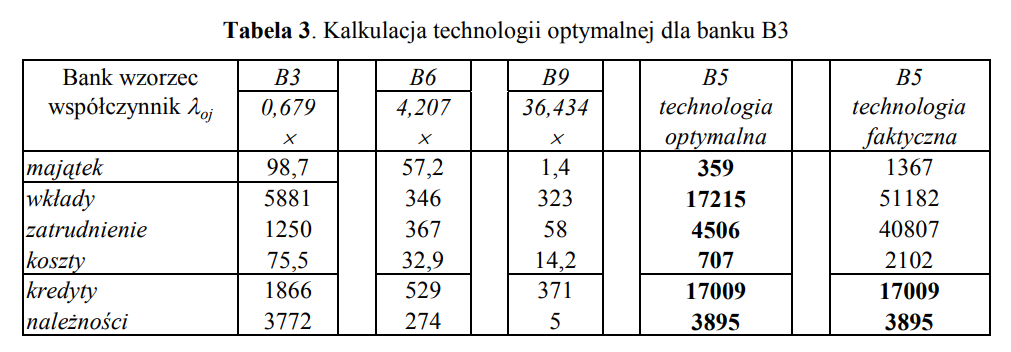

## Porównujemy technologię optymalną z technologią faktyczną

#### dodaje wektor faktycznych nakładów 

In [24]:
TP = np.array(df[M])
e = TO.size
TP = TP.reshape((e, 1))
TP

array([[4.00e+00],
       [1.50e-01],
       [3.38e+03],
       [4.00e+00],
       [1.52e+03],
       [2.50e-01],
       [6.56e+02],
       [5.40e+01]])

#### różnica

In [25]:
KOF = TP-TO
KOF

array([[ 1.9000e+00],
       [ 5.0000e-02],
       [ 2.3216e+03],
       [ 1.9000e+00],
       [ 7.4710e+02],
       [ 1.5000e-01],
       [-5.0000e-01],
       [-4.1200e+01]])

#### połaczenie

In [26]:
PKN = np.append(TO,TP,axis=1)
PKN

array([[2.1000e+00, 4.0000e+00],
       [1.0000e-01, 1.5000e-01],
       [1.0584e+03, 3.3800e+03],
       [2.1000e+00, 4.0000e+00],
       [7.7290e+02, 1.5200e+03],
       [1.0000e-01, 2.5000e-01],
       [6.5650e+02, 6.5600e+02],
       [9.5200e+01, 5.4000e+01]])

In [27]:
PKN = np.append(PKN,KOF,axis=1)
PKN

array([[ 2.1000e+00,  4.0000e+00,  1.9000e+00],
       [ 1.0000e-01,  1.5000e-01,  5.0000e-02],
       [ 1.0584e+03,  3.3800e+03,  2.3216e+03],
       [ 2.1000e+00,  4.0000e+00,  1.9000e+00],
       [ 7.7290e+02,  1.5200e+03,  7.4710e+02],
       [ 1.0000e-01,  2.5000e-01,  1.5000e-01],
       [ 6.5650e+02,  6.5600e+02, -5.0000e-01],
       [ 9.5200e+01,  5.4000e+01, -4.1200e+01]])

In [28]:
Fot = ['Technologia P8 optymalna', 'Technologia P8 faktyczna','Różnica']

In [29]:
from tabulate import tabulate

## "plain","simple","grid","pipe","orgtbl","rst","mediawiki","latex", "fancy_grid" 
# 
# ,showindex=index_values
SKK = tabulate(PKN,headers= Fot,tablefmt="fancy_grid",showindex=index_values)  
print(SKK)

╒═══════════════════════════════════════╤════════════════════════════╤════════════════════════════╤═══════════╕
│                                       │   Technologia P8 optymalna │   Technologia P8 faktyczna │   Różnica │
╞═══════════════════════════════════════╪════════════════════════════╪════════════════════════════╪═══════════╡
│ Ilość dni absencji                    │                        2.1 │                       4    │      1.9  │
├───────────────────────────────────────┼────────────────────────────┼────────────────────────────┼───────────┤
│ Puste przebiegi                       │                        0.1 │                       0.15 │      0.05 │
├───────────────────────────────────────┼────────────────────────────┼────────────────────────────┼───────────┤
│ Przejechane kilometry                 │                     1058.4 │                    3380    │   2321.6  │
├───────────────────────────────────────┼────────────────────────────┼────────────────────────────┼─────

<span style="font-size: 200%;color:white;background:#1155cc"> 6 </span>
<span style="font-size: 200%;color:white;background:#a2c4c9"> Wyznaczenie banku wzorcowego 
    
    Ten bank, który będezie miał najwięcej w podsumowaniu ten jest najlepszy, wzorcowy

In [30]:
ranking_CCR[PEL]

,P4,P5,P6
0,0.952,0.276,0.000
0,0.721,0.109,0.000
0,0.230,0.329,0.235
0,1.000,0.000,-0.000
0,0.000,1.000,-0.000
0,0.000,0.000,1.000
0,0.351,0.088,0.128
0,0.539,0.095,0.000
0,0.670,0.000,0.090


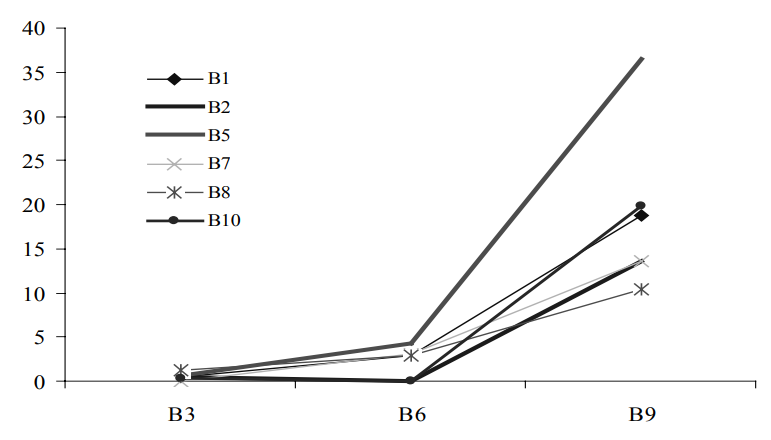

In [31]:
TOk = ranking_CCR[PEL].sum(axis=0)
TOk

P4    4.463
P5    1.897
P6    1.453
dtype: float64

Banki optymalne, na których mogą sie wzorować banki nieoptymalne to B6 i B9. Bank B3 ma mało punktów zas B4 prawie wcale.  

<span style="font-size: 200%;color:white;background:#1155cc"> 7 </span>
<span style="font-size: 200%;color:white;background:#a2c4c9"> Wyznaczenie korzyści skali banków 
    
    Ten bank, który będezie miał 1 ma stałe korzyści skali

### sumuje wiersze

In [32]:
ranking_CCR["sum"] = ranking_CCR[name].sum(axis=1)
ranking_CCR["sum"] = round(ranking_CCR["sum"],1)
ranking_CCR

,Pracownik,k,P1,P2,P3,P4,P5,P6,P7,P8,P9,sum
0,P1,0.989,0.0,0.0,0.0,0.952,0.276,0.000,0.0,0.0,0.0,1.2
0,P2,0.676,0.0,0.0,0.0,0.721,0.109,0.000,0.0,0.0,0.0,0.8
0,P3,0.985,-0.0,-0.0,0.0,0.230,0.329,0.235,-0.0,-0.0,-0.0,0.8
0,P4,1.000,0.0,-0.0,-0.0,1.000,0.000,-0.000,-0.0,-0.0,-0.0,1.0
0,P5,1.000,0.0,-0.0,-0.0,0.000,1.000,-0.000,-0.0,-0.0,-0.0,1.0
0,P6,1.000,-0.0,-0.0,0.0,0.000,0.000,1.000,0.0,-0.0,0.0,1.0
0,P7,0.927,0.0,0.0,0.0,0.351,0.088,0.128,0.0,0.0,0.0,0.6
0,P8,0.530,0.0,0.0,0.0,0.539,0.095,0.000,0.0,0.0,0.0,0.6
0,P9,0.806,0.0,0.0,0.0,0.670,0.000,0.090,0.0,0.0,0.0,0.8


In [33]:

PIS = ranking_CCR[['Pracownik','sum']]
PIS = np.array(PIS)
e = PIS.size
#PIS = PIS.reshape((1, e))
PIS

array([['P1', 1.2],
       ['P2', 0.8],
       ['P3', 0.8],
       ['P4', 1.0],
       ['P5', 1.0],
       ['P6', 1.0],
       ['P7', 0.6],
       ['P8', 0.6],
       ['P9', 0.8]], dtype=object)

In [34]:
from tabulate import tabulate

## "plain","simple","grid","pipe","orgtbl","rst","mediawiki","latex", "fancy_grid" 

ZP = ['Banki','L0']

PZU = tabulate(PIS,headers= ZP,tablefmt="fancy_grid")  
print(PZU)

╒═════════╤══════╕
│ Banki   │   L0 │
╞═════════╪══════╡
│ P1      │  1.2 │
├─────────┼──────┤
│ P2      │  0.8 │
├─────────┼──────┤
│ P3      │  0.8 │
├─────────┼──────┤
│ P4      │  1   │
├─────────┼──────┤
│ P5      │  1   │
├─────────┼──────┤
│ P6      │  1   │
├─────────┼──────┤
│ P7      │  0.6 │
├─────────┼──────┤
│ P8      │  0.6 │
├─────────┼──────┤
│ P9      │  0.8 │
╘═════════╧══════╛


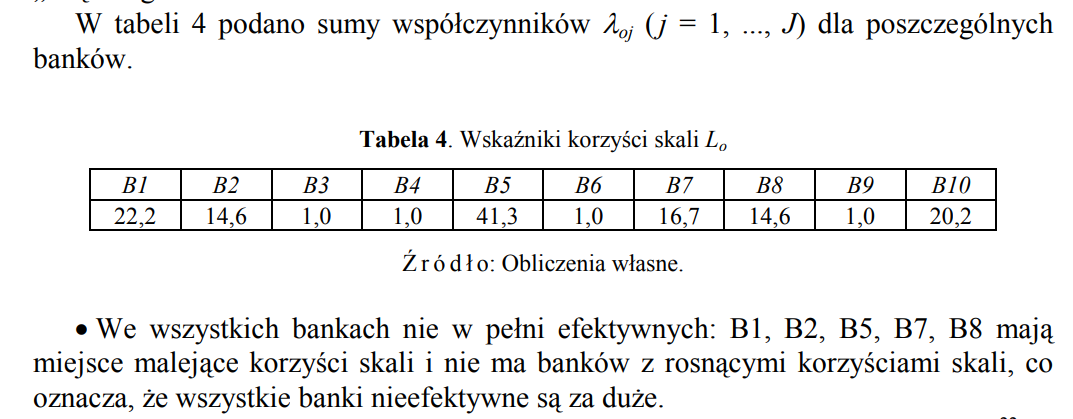

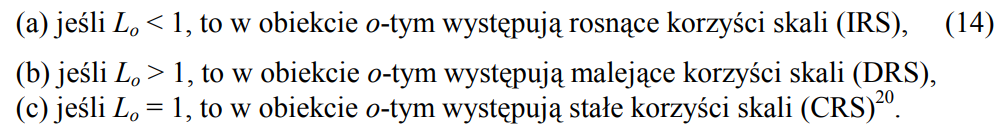

<span style="font-size: 200%;color:white;background:#1155cc"> 8 </span>
<span style="font-size: 200%;color:white;background:#a2c4c9"> WYBÓR TECHNOLOGII DOCELOWEJ 

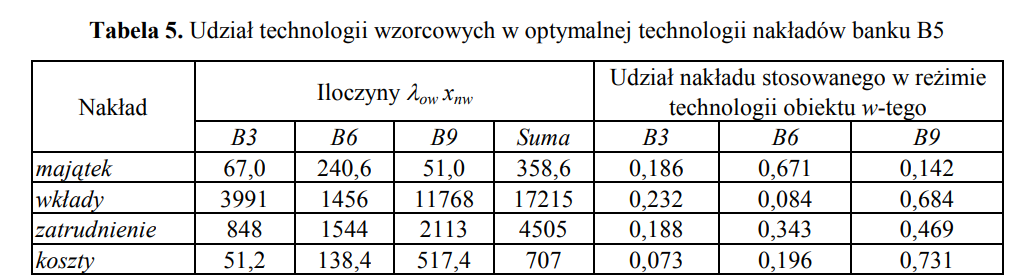

RR to ilość wektorów (wierszy) nakładów

In [35]:
SUK

array([[1.600e+00, 5.000e-01, 0.000e+00],
       [1.000e-01, 0.000e+00, 0.000e+00],
       [8.867e+02, 1.717e+02, 0.000e+00],
       [1.100e+00, 1.000e+00, 0.000e+00],
       [6.684e+02, 1.045e+02, 0.000e+00],
       [1.000e-01, 0.000e+00, 0.000e+00],
       [5.606e+02, 9.590e+01, 0.000e+00],
       [5.770e+01, 3.750e+01, 0.000e+00]])

In [36]:
GOS = SUK/TO
GOS = np.round(GOS,3)
GOS

array([[0.762, 0.238, 0.   ],
       [1.   , 0.   , 0.   ],
       [0.838, 0.162, 0.   ],
       [0.524, 0.476, 0.   ],
       [0.865, 0.135, 0.   ],
       [1.   , 0.   , 0.   ],
       [0.854, 0.146, 0.   ],
       [0.606, 0.394, 0.   ]])

In [37]:
PRL = np.append(SUK,TO,axis=1)
PRL = np.append(PRL,GOS,axis=1)
PRL = PRL[:RR]
PRL

array([[1.6000e+00, 5.0000e-01, 0.0000e+00, 2.1000e+00, 7.6200e-01,
        2.3800e-01, 0.0000e+00],
       [1.0000e-01, 0.0000e+00, 0.0000e+00, 1.0000e-01, 1.0000e+00,
        0.0000e+00, 0.0000e+00],
       [8.8670e+02, 1.7170e+02, 0.0000e+00, 1.0584e+03, 8.3800e-01,
        1.6200e-01, 0.0000e+00],
       [1.1000e+00, 1.0000e+00, 0.0000e+00, 2.1000e+00, 5.2400e-01,
        4.7600e-01, 0.0000e+00],
       [6.6840e+02, 1.0450e+02, 0.0000e+00, 7.7290e+02, 8.6500e-01,
        1.3500e-01, 0.0000e+00],
       [1.0000e-01, 0.0000e+00, 0.0000e+00, 1.0000e-01, 1.0000e+00,
        0.0000e+00, 0.0000e+00]])

In [38]:
from tabulate import tabulate

## "plain","simple","grid","pipe","orgtbl","rst","mediawiki","latex", "fancy_grid" 
# 
naz = ['Ilość dni absencji', 'Puste przebiegi ', 'Przejechane kilometry', 'Liczba zastrzeżeń', 'Koszty hoteli','Stosunek czasu jazdy do czasu spotkań']
NOS = ['P4*λ4','P5*λ5','P6*λ6','T.O.', 'Zn.P4','Zn.P5','Zn.P6']
# ,headers= NOS
# 
ZHP = tabulate(PRL,headers= NOS,tablefmt="fancy_grid",showindex=naz)  
print(ZHP)

╒═══════════════════════════════════════╤═════════╤═════════╤═════════╤════════╤═════════╤═════════╤═════════╕
│                                       │   P4*λ4 │   P5*λ5 │   P6*λ6 │   T.O. │   Zn.P4 │   Zn.P5 │   Zn.P6 │
╞═══════════════════════════════════════╪═════════╪═════════╪═════════╪════════╪═════════╪═════════╪═════════╡
│ Ilość dni absencji                    │     1.6 │     0.5 │       0 │    2.1 │   0.762 │   0.238 │       0 │
├───────────────────────────────────────┼─────────┼─────────┼─────────┼────────┼─────────┼─────────┼─────────┤
│ Puste przebiegi                       │     0.1 │     0   │       0 │    0.1 │   1     │   0     │       0 │
├───────────────────────────────────────┼─────────┼─────────┼─────────┼────────┼─────────┼─────────┼─────────┤
│ Przejechane kilometry                 │   886.7 │   171.7 │       0 │ 1058.4 │   0.838 │   0.162 │       0 │
├───────────────────────────────────────┼─────────┼─────────┼─────────┼────────┼─────────┼─────────┼─────────┤
│

Kolumny A3 - A9 wybieramy nawjwiększe wartości.  

    • W zakresie korzystania z majątku bank B5 powinien wzorować się przede
    wszystkim na technologii stosowanej w obiekcie B6. Udział majątku „zarządzanego”
    według tej technologii jest dominujący i wynosi 67,1%. Udział dwóch pozostałych
    technologii wzorcowych jest mniej więcej podobny (po 14–18%).
    
    • Jeśli idzie o wkłady, to należy wzorować się na technologii banku B9 (68,4%),
    a w mniejszym stopniu na technologii banku B3 (23,2%). Technologia banku B3 jest
    praktycznie bez znaczenia.

    • W wypadku zatrudnienia, technologie wszystkich trzech banków wzorcowych są
    reprezentowane bardzo wyraźnie w technologii optymalnej dla banku B5: technologia
    banku B9 obejmuje 47% zatrudnienia, banku B6 – 34,3%, banku B3 – 18,8%.

    • W przypadku kosztów, podobnie jak dla wkładów, dominuje technologia banku B9
    (73,1%). Istotna jest też technologia banku B6 (19,6%), a nieistotna technologia banku B3.